In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import category_encoders as ce # pip install category_encoders to install
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"C:\Users\D\Desktop\New Assignments  Keys\Datasets\Ensemble_Password_Strength.xlsx")

# checking head and null values
df.head()

,characters,characters_strength
0,kzde5577,1.0
1,kino3434,1.0
2,visi7k1yr,1.0
3,megzy123,1.0
4,lamborghin1,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   characters           1999 non-null   object 
 1   characters_strength  1999 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.4+ KB


In [4]:
# Input and Output Split
predictors = pd.get_dummies(df["characters"],drop_first = True)
target = df["characters_strength"].astype('int64')

In [5]:
# Train Test partition of the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state=0)

In [6]:
########################### Bagging ############################################

from sklearn import tree
clftree = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier


bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 500,
                            bootstrap = True, n_jobs = 1, random_state = 42)

bag_clf.fit(x_train, y_train) 

from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Testing Data
print("Confusion-Matrix(Test):\n",confusion_matrix(y_test, bag_clf.predict(x_test)))
print("Accuracy(Test):",accuracy_score(y_test, bag_clf.predict(x_test)))

# Evaluation on Training Data
print("Confusion-Matrix(Train):\n",confusion_matrix(y_train, bag_clf.predict(x_train)))
print("Accuracy(Test):",accuracy_score(y_train, bag_clf.predict(x_train)))

Confusion-Matrix(Test):
 [[  0  47]
 [  0 353]]
Accuracy(Test): 0.8825
Confusion-Matrix(Train):
 [[ 237    0]
 [   0 1362]]
Accuracy(Test): 1.0


In [7]:
########################### Voting ############################################

# Import the required libraries
from sklearn import datasets, linear_model, svm, neighbors, naive_bayes
from sklearn.ensemble import VotingClassifier

# Instantiate the learners (classifiers)
learner_1 = neighbors.KNeighborsClassifier(n_neighbors=5)
learner_2 = linear_model.Perceptron(tol=1e-2, random_state=0)
learner_3 = svm.SVC(gamma=0.001)

# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_1),
                           ('Prc', learner_2),
                           ('SVM', learner_3)])

# Fit classifier with the training data
voting.fit(x_train, y_train)

# Predict the most voted class
hard_predictions = voting.predict(x_test)

# Accuracy of hard voting
print('Hard Voting:', accuracy_score(y_test, hard_predictions))



#################

# Soft Voting # 
# Instantiate the learners (classifiers)
learner_4 = neighbors.KNeighborsClassifier(n_neighbors = 5)
learner_5 = naive_bayes.GaussianNB()
learner_6 = svm.SVC(gamma = 0.001, probability = True)

# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_4),
                           ('NB', learner_5),
                           ('SVM', learner_6)],
                            voting = 'soft')

# Fit classifier with the training data
voting.fit(x_train, y_train)
learner_4.fit(x_train, y_train)
learner_5.fit(x_train, y_train)
learner_6.fit(x_train, y_train)

# Predict the most probable class
hard_predictions = voting.predict(x_test)

# Get the base learner predictions
predictions_4 = learner_4.predict(x_test)
predictions_5 = learner_5.predict(x_test)
predictions_6 = learner_6.predict(x_test)

# Accuracies of base learners
print('L4:', accuracy_score(y_test, predictions_4)) 
print('L5:', accuracy_score(y_test, predictions_5)) 
print('L6:', accuracy_score(y_test, predictions_6)) 
# Accuracy of Soft voting
print('Soft Voting:', accuracy_score(y_test, hard_predictions)) 

Hard Voting: 0.8825
L4: 0.8825
L5: 0.1175
L6: 0.8825
Soft Voting: 0.8825


In [10]:
###############################################################################

########################## Adaboost ##########################################

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

ada_clf.fit(x_train, y_train)
print("AdaBoost")
# Evaluation on Testing Data
print("Confusion-Matrix(Test):\n",confusion_matrix(y_test, ada_clf.predict(x_test)))
print("Accuracy(Test):",accuracy_score(y_test, ada_clf.predict(x_test)))

# Evaluation on Training Data
print("Confusion-Matrix(Train):\n",confusion_matrix(y_train, ada_clf.predict(x_train)))
print("Accuracy(Test):",accuracy_score(y_train, ada_clf.predict(x_train)))


################################################################################

##################################### Gradiant boost ##########################


from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()

boost_clf.fit(x_train, y_train)
print("Gradient Boost")
# Evaluation on Testing Data
print("Confusion-Matrix(Test):\n",confusion_matrix(y_test, boost_clf.predict(x_test)))
print("Accuracy(Test):",accuracy_score(y_test, boost_clf.predict(x_test)))

# Evaluation on Training Data
print("Confusion-Matrix(Train):\n",confusion_matrix(y_train, boost_clf.predict(x_train)))
print("Accuracy(Test):",accuracy_score(y_train, boost_clf.predict(x_train)))

AdaBoost
Confusion-Matrix(Test):
 [[  0  47]
 [  0 353]]
Accuracy(Test): 0.8825
Confusion-Matrix(Train):
 [[ 237    0]
 [   0 1362]]
Accuracy(Test): 1.0
Gradient Boost
Confusion-Matrix(Test):
 [[  0  47]
 [  0 353]]
Accuracy(Test): 0.8825
Confusion-Matrix(Train):
 [[   0  237]
 [   0 1362]]
Accuracy(Test): 0.851782363977486


>lr 0.852 (0.003)
>knn 0.852 (0.003)
>cart 0.852 (0.003)
>svm 0.852 (0.003)
>bayes 0.148 (0.003)


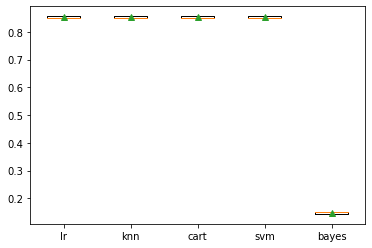

In [13]:
##################################### Staking #################################
# compare standalone models for binary classification
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

X = x_train
y = y_train
# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [14]:
# make a prediction with a stacking ensemble
from sklearn.ensemble import StackingClassifier
# define dataset
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# fit the model on all available data
model.fit(X, y)

# make a prediction on test data
yhat = model.predict(x_test)

# Evaluation on Testing Data
print("Confusion-Matrix(Test):\n",confusion_matrix(y_test, yhat))
print("Accuracy(Test):",accuracy_score(y_test,yhat))


# Evaluation on Training Data
print("Confusion-Matrix(Train):\n",confusion_matrix(y_train, model.predict(x_train)))
print("Accuracy(Train):",accuracy_score(y_train, model.predict(x_train)))

Confusion-Matrix(Test):
 [[  0  47]
 [  0 353]]
Accuracy(Test): 0.8825
Confusion-Matrix(Train):
 [[   0  237]
 [   0 1362]]
Accuracy(Train): 0.851782363977486
